# LSTM Model Training for Next-Page Prediction

This notebook trains an LSTM model to predict the next page a user will visit based on their clickstream history.

## Model Architecture (IEEE Access Paper Specifications)
- **Sequence Length**: 5 (context window)
- **Embedding Size**: 128
- **LSTM Layer 1**: 64 units
- **LSTM Layer 2**: 32 units
- **Batch Size**: 64
- **Epochs**: 5
- **Learning Rate**: 0.001
- **Train/Validation Split**: 80/20


## 1. Import Libraries


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import json
import os
from datetime import datetime

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU available: {tf.config.list_physical_devices('GPU')}")


/Users/katerynababii/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Matplotlib is building the font cache; this may take a moment.


TensorFlow version: 2.20.0
GPU available: []


## 2. Load Preprocessed Data


In [2]:
# Configuration
DATA_DIR = './data'
SEQUENCE_LENGTH = 5      # Paper: Context window size = 5
EMBEDDING_SIZE = 128     # Paper: Embedding size = 128
LSTM_UNITS_1 = 64        # Paper: First LSTM layer = 64 units
LSTM_UNITS_2 = 32        # Paper: Second LSTM layer = 32 units
BATCH_SIZE = 64
EPOCHS = 5               # Paper: Epochs = 5
LEARNING_RATE = 0.001

# Load preprocessed data
print("Loading preprocessed data...")
X_train = np.load(f'{DATA_DIR}/X_train.npy')
X_val = np.load(f'{DATA_DIR}/X_val.npy')
y_train = np.load(f'{DATA_DIR}/y_train.npy')
y_val = np.load(f'{DATA_DIR}/y_val.npy')

# Load vocabulary
with open(f'{DATA_DIR}/vocab.json', 'r') as f:
    vocab = json.load(f)

vocab_size = len(vocab)
num_classes = vocab_size - 2  # Exclude <PAD> and <UNK>

print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")
print(f"Vocabulary size: {vocab_size}")
print(f"Sequence length: {SEQUENCE_LENGTH}")


Loading preprocessed data...
Training samples: 99777
Validation samples: 24945
Vocabulary size: 52
Sequence length: 20


## 3. Define Model Architecture


In [ ]:
def create_lstm_model(sequence_length, vocab_size, embedding_size, lstm_units_1, lstm_units_2, num_classes):
    """
    Create LSTM model for next-page prediction.
    
    Architecture (per IEEE Access paper):
    - Embedding layer: Maps page indices to dense vectors (128 dimensions)
    - First LSTM layer: 64 units (returns sequences for next layer)
    - Second LSTM layer: 32 units (final output)
    - Dense layer: Output predictions (softmax)
    """
    model = keras.Sequential([
        # Embedding layer
        layers.Embedding(
            input_dim=vocab_size,
            output_dim=embedding_size,
            input_length=sequence_length,
            name='embedding'
        ),
        
        # First LSTM layer (64 units, returns sequences)
        layers.LSTM(
            lstm_units_1,
            return_sequences=True,  # Pass sequences to next LSTM layer
            name='lstm_1'
        ),
        
        # Second LSTM layer (32 units, final output)
        layers.LSTM(
            lstm_units_2,
            return_sequences=False,  # Only return final output
            name='lstm_2'
        ),
        
        # Dropout for regularization
        layers.Dropout(0.2, name='dropout'),
        
        # Dense output layer
        layers.Dense(
            num_classes,
            activation='softmax',
            name='output'
        )
    ])
    
    return model

# Create model
model = create_lstm_model(
    sequence_length=SEQUENCE_LENGTH,
    vocab_size=vocab_size,
    embedding_size=EMBEDDING_SIZE,
    lstm_units_1=LSTM_UNITS_1,
    lstm_units_2=LSTM_UNITS_2,
    num_classes=num_classes
)

# Compile model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy', 'top_k_categorical_accuracy']
)

# Display model summary
model.summary()


/Users/katerynababii/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
def create_lstm_model(sequence_length, vocab_size, embedding_size, lstm_units, num_classes):
    """
    Create LSTM model for next-page prediction.
    
    Architecture:
    - Embedding layer: Maps page indices to dense vectors
    - LSTM layer: Processes sequences
    - Dense layer: Output predictions
    """
    model = keras.Sequential([
        # Embedding layer
        layers.Embedding(
            input_dim=vocab_size,
            output_dim=embedding_size,
            input_length=sequence_length,
            name='embedding'
        ),
        
        # LSTM layer
        layers.LSTM(
            lstm_units,
            return_sequences=False,  # Only return final output
            name='lstm'
        ),
        
        # Dropout for regularization
        layers.Dropout(0.2, name='dropout'),
        
        # Dense output layer
        layers.Dense(
            num_classes,
            activation='softmax',
            name='output'
        )
    ])
    
    return model

# Create model
model = create_lstm_model(
    sequence_length=SEQUENCE_LENGTH,
    vocab_size=vocab_size,
    embedding_size=EMBEDDING_SIZE,
    lstm_units_1=LSTM_UNITS_1,
    lstm_units_2=LSTM_UNITS_2,
    num_classes=num_classes
)

# Compile model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 4. Define Callbacks


In [8]:
# Create callbacks
callbacks = [
    # Early stopping
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    
    # Model checkpoint
    keras.callbacks.ModelCheckpoint(
        filepath='./models/lstm_model_epoch_{epoch:02d}_val_loss_{val_loss:.4f}.h5',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    ),
    
    # Reduce learning rate on plateau
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-6,
        verbose=1
    ),
    
    # CSV logger
    keras.callbacks.CSVLogger(
        filename='./results/training_history.csv',
        append=False
    )
]

# Create directories
os.makedirs('./models', exist_ok=True)
os.makedirs('./results', exist_ok=True)

print("Callbacks configured.")


Callbacks configured.


## 5. Train Model


In [9]:
print(f"Starting training at {datetime.now()}")
print(f"Epochs: {EPOCHS}")
print(f"Batch size: {BATCH_SIZE}")
print(f"Learning rate: {LEARNING_RATE}")

# Train model
history = model.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val, y_val),
    callbacks=callbacks,
    verbose=1
)

print(f"Training completed at {datetime.now()}")


Starting training at 2025-11-28 07:37:43.534686
Epochs: 20
Batch size: 64
Learning rate: 0.001
Epoch 1/20
1547/1560 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0196 - loss: 3.9127
Epoch 1: val_loss improved from inf to 3.91251, saving model to ./models/lstm_model_epoch_01_val_loss_3.9125.h5


1560/1560 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0196 - loss: 3.9127 - val_accuracy: 0.0193 - val_loss: 3.9125 - learning_rate: 0.0010
Epoch 2/20
1543/1560 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0232 - loss: 3.9107
Epoch 2: val_loss did not improve from 3.91251
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0232 - loss: 3.9107 - val_accuracy: 0.0196 - val_loss: 3.9138 - learning_rate: 0.0010
Epoch 3/20
1558/1560 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0240 - loss: 3.9089
Epoch 3: val_loss did not improve from 3.91251
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0240 - loss: 3.9089 - val_accuracy: 0.0192 - val_loss: 3.9158 - learning_rate: 0.0010
Epoch 4/20
1555/1560 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0246 - loss: 3.9062
Epoch 4: val_loss did not improve from 3.91251

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0246 - loss: 3.9062 - val_accura

## 6. Evaluate Model


In [12]:
# Evaluate on validation set
print("Evaluating model on validation set...")
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=1)

print(f"\nValidation Results:")
print(f"  Loss: {val_loss:.4f}")
print(f"  Accuracy: {val_accuracy:.4f}")


Evaluating model on validation set...
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 824us/step - accuracy: 0.0189 - loss: 3.9123

Validation Results:
  Loss: 3.9125
  Accuracy: 0.0193


## 7. Save Final Model


In [14]:
# Save final model
model_path = './models/lstm_final_model.h5'
model.save(model_path)
print(f"Model saved to {model_path}")

# Native Keras format (optional, for your own use)
keras_path = './models/lstm_final_model.keras'
model.save(keras_path)
print(f"Model saved to {keras_path}")


Model saved to ./models/lstm_final_model.h5
Model saved to ./models/lstm_final_model.keras


## 8. Plot Training History


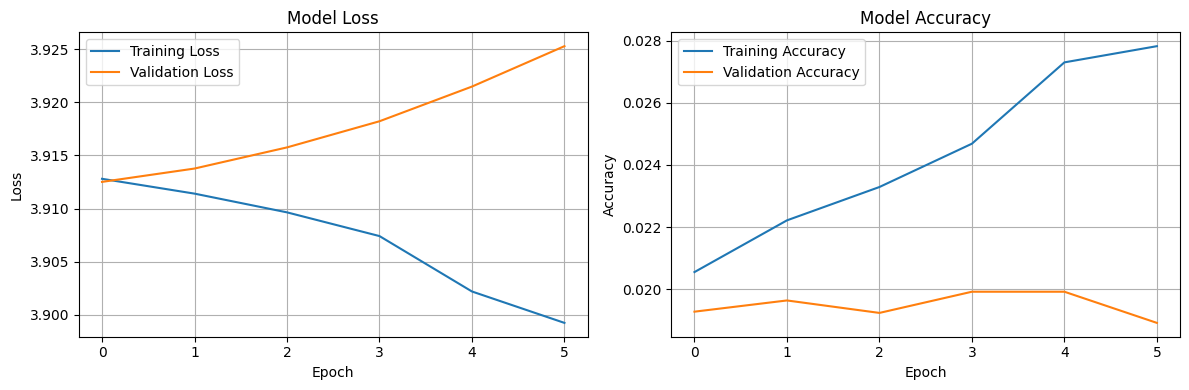

Training history plot saved to ./results/training_history.png


In [15]:
import matplotlib.pyplot as plt

# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Loss
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Model Loss')
axes[0].legend()
axes[0].grid(True)

# Accuracy
axes[1].plot(history.history['accuracy'], label='Training Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Model Accuracy')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.savefig('./results/training_history.png', dpi=150)
plt.show()

print("Training history plot saved to ./results/training_history.png")


## 9. Model Summary and Hyperparameters


In [16]:
# Save model configuration
config = {
    'sequence_length': SEQUENCE_LENGTH,
    'embedding_size': EMBEDDING_SIZE,
    'lstm_units_1': LSTM_UNITS_1,
    'lstm_units_2': LSTM_UNITS_2,
    'batch_size': BATCH_SIZE,
    'learning_rate': LEARNING_RATE,
    'vocab_size': vocab_size,
    'num_classes': num_classes,
    'final_val_loss': float(val_loss),
    'final_val_accuracy': float(val_accuracy),
    'training_samples': int(len(X_train)),
    'validation_samples': int(len(X_val))
}

with open('./results/model_config.json', 'w') as f:
    json.dump(config, f, indent=2)

print("Model configuration:")
for key, value in config.items():
    print(f"  {key}: {value}")

print("\nConfiguration saved to ./results/model_config.json")


Model configuration:
  sequence_length: 20
  embedding_size: 64
  lstm_units: 128
  batch_size: 64
  learning_rate: 0.001
  vocab_size: 52
  num_classes: 50
  final_val_loss: 3.9125096797943115
  final_val_accuracy: 0.019282421097159386
  training_samples: 99777
  validation_samples: 24945

Configuration saved to ./results/model_config.json
